In [1]:
# Created By Venujan Malaiyandi
# BSCP|CS|61|101
# For Task 6.2D or 6.2C
# Cyber Security Analytics

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [3]:
# Read the dataset from the file
df = pd.read_csv('payment_fraud.csv')

In [4]:
df = pd.get_dummies(df, columns=['paymentMethod'])


In [5]:
df

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit
0,29,1,4.745402,28.204861,0,False,True,False
1,725,1,4.742303,0.000000,0,False,False,True
2,845,1,4.921318,0.000000,0,True,False,False
3,503,1,4.886641,0.000000,0,True,False,False
4,2000,1,5.040929,0.000000,0,True,False,False
...,...,...,...,...,...,...,...,...
39216,986,1,4.836982,0.000000,0,True,False,False
39217,1647,1,4.876771,377.930556,0,True,False,False
39218,1591,1,4.742303,0.000000,0,True,False,False
39219,237,1,4.921318,236.082639,0,True,False,False


In [17]:
X = df.drop('label', axis=1)
Y = df['label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


Logistic Regression with C=1:
Training Set Score: 1.0
Test Set Score: 1.0

Logistic Regression with C=100:
Training Set Score: 1.0
Test Set Score: 1.0

Logistic Regression with C=10:
Training Set Score: 1.0
Test Set Score: 1.0

Logistic Regression with C=0.01:
Training Set Score: 0.9999238907070553
Test Set Score: 0.9996136907981148

Logistic Regression with C=0.001:
Training Set Score: 0.9859197808052363
Test Set Score: 0.9853202503283628


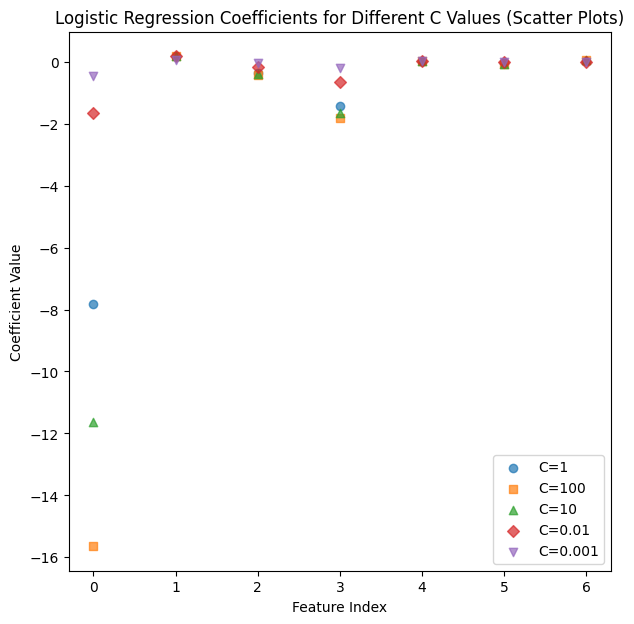

In [24]:
C_values = [1, 100, 10, 0.01, 0.001]

markers = ['o', 's', '^', 'D', 'v']

# Create a subplot for the scatter plots
plt.figure(figsize=(7, 7), dpi=100)
plt.title('Logistic Regression Coefficients for Different C Values (Scatter Plots)')

for C, marker in zip(C_values, markers):
    # Create and fit the logistic regression model
    model = LogisticRegression(C=C)
    model.fit(X_train, Y_train)

    
    # Print C value
    print(f"\nLogistic Regression with C={C}:")

    # Print training set and test set scores
    train_score = model.score(X_train, Y_train)
    test_score = model.score(X_test, Y_test)
    print(f"Training Set Score: {train_score}")
    print(f"Test Set Score: {test_score}")

    # Scatter plot of coefficients with different symbols for each C
    plt.scatter(range(len(model.coef_[0])), model.coef_[0], label=f'C={C}', alpha=0.7, marker=marker)

# Add labels and legend
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()


Decision Tree:
Training Set Score: 1.0
Test Set Score: 1.0
Decision Tree Depth: 1
Decision Tree Feature Importances: [1. 0. 0. 0. 0. 0. 0.]


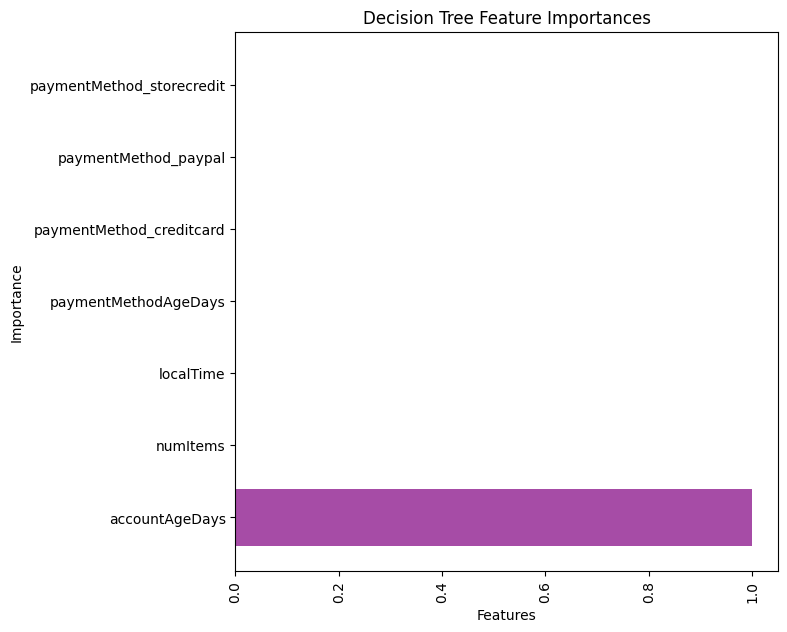

In [35]:
# Create and fit the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)

# Print training set and test set scores
dt_train_score = dt_model.score(X_train, Y_train)
dt_test_score = dt_model.score(X_test, Y_test)
print("Decision Tree:")
print(f"Training Set Score: {dt_train_score}")
print(f"Test Set Score: {dt_test_score}")

# Print decision tree depth
print("Decision Tree Depth:", dt_model.get_depth())

# Print feature importances
print("Decision Tree Feature Importances:", dt_model.feature_importances_)

# Visualize decision tree feature importances
plt.figure(figsize=(7, 7), dpi=100)
plt.barh(X.columns, dt_model.feature_importances_, color='purple', alpha=0.7)
plt.title('Decision Tree Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)  #
plt.show()